### Obesity Analysis

#### Website : https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

#### Description: 
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 

#### Data Understanding:
    * FAVC : Do you eat high caloric food frequently?
    * FCVC : Do you usually eat vegetables in your meals?
    * NCP  : How many main meals do you have daily?
    * CAEC : Do you eat any food between meals?
    * CH2O : How much water do you drink daily?
    * SCC  : Do you monitor the calories you eat daily?
    * FAF  : How often do you have physical activity?	
    * TUE  : How much time do you use technological devices such as cell phone, videogames, television, computer and others?	
    * CALC : How often do you drink alcohol?	
    * MTRANS : Which transportation do you usually use?	
    * Obesity_status : Obesity level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#df.rename(columns={"A": "a", "B": "c"})
data = data.rename(columns={
    'FAVC' : 'HCF',
    'FCVC' : 'Vegetables',
    'NCP' : 'Meals_per_day',
    'CAEC' : 'Food_btwn_meals',
    'CH2O' : 'Water_frequency',
    'SCC' : 'Calories_Monitoring',
    'FAF' : 'Physiscal_activity',
    'TUE' : 'Time_on_phone',
    'CALC' : 'Alcohol',
    'MTRANS' : 'Transportation',
    'NObeyesdad':'Obesity_status',
    'SMOKE':'SMOKING',
    'family_history_with_overweight': 'OW_genes'
})

In [5]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'OW_genes', 'HCF', 'Vegetables',
       'Meals_per_day', 'Food_btwn_meals', 'SMOKING', 'Water_frequency',
       'Calories_Monitoring', 'Physiscal_activity', 'Time_on_phone', 'Alcohol',
       'Transportation', 'Obesity_status'],
      dtype='object')

In [7]:
data.describe()

,Age,Height,Weight,Vegetables,Meals_per_day,Water_frequency,Physiscal_activity,Time_on_phone
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


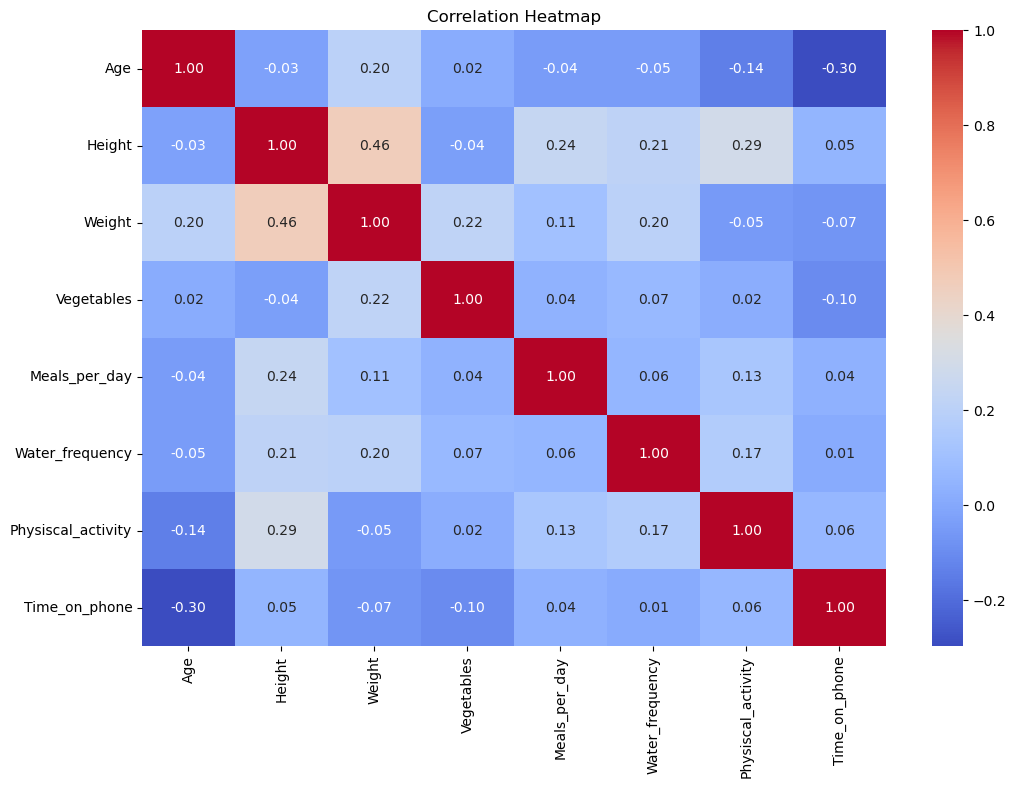

In [8]:
 correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

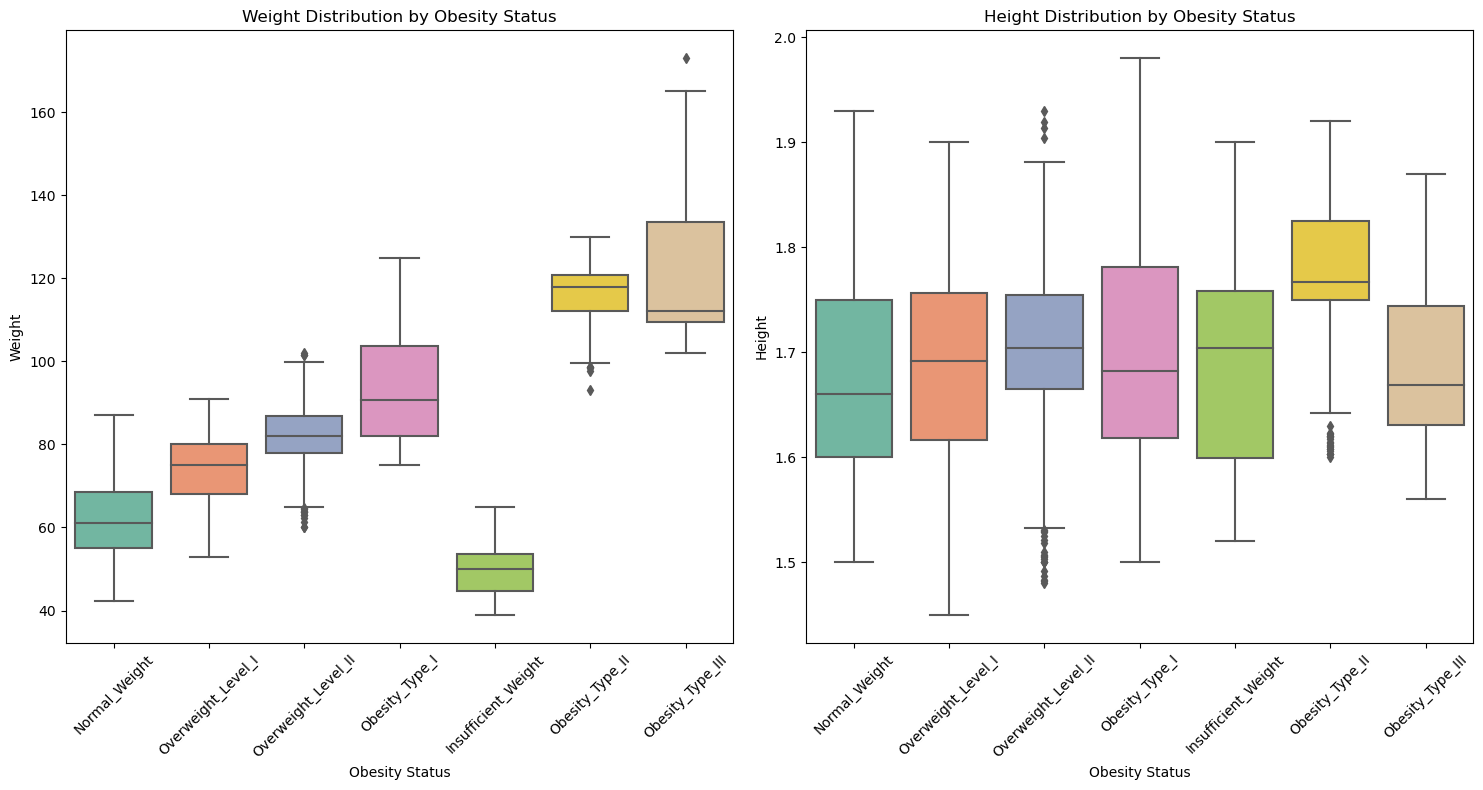

In [13]:
plot_columns = ['Weight', 'Height']

    # Set up the figure
plt.figure(figsize=(15, 8))

    # Generate boxplots for each numerical column
for i, col in enumerate(plot_columns, 1):
    plt.subplot(1, len(plot_columns), i)
    sns.boxplot(x='Obesity_status', y=col, data=data, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Obesity Status')
    plt.xlabel('Obesity Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

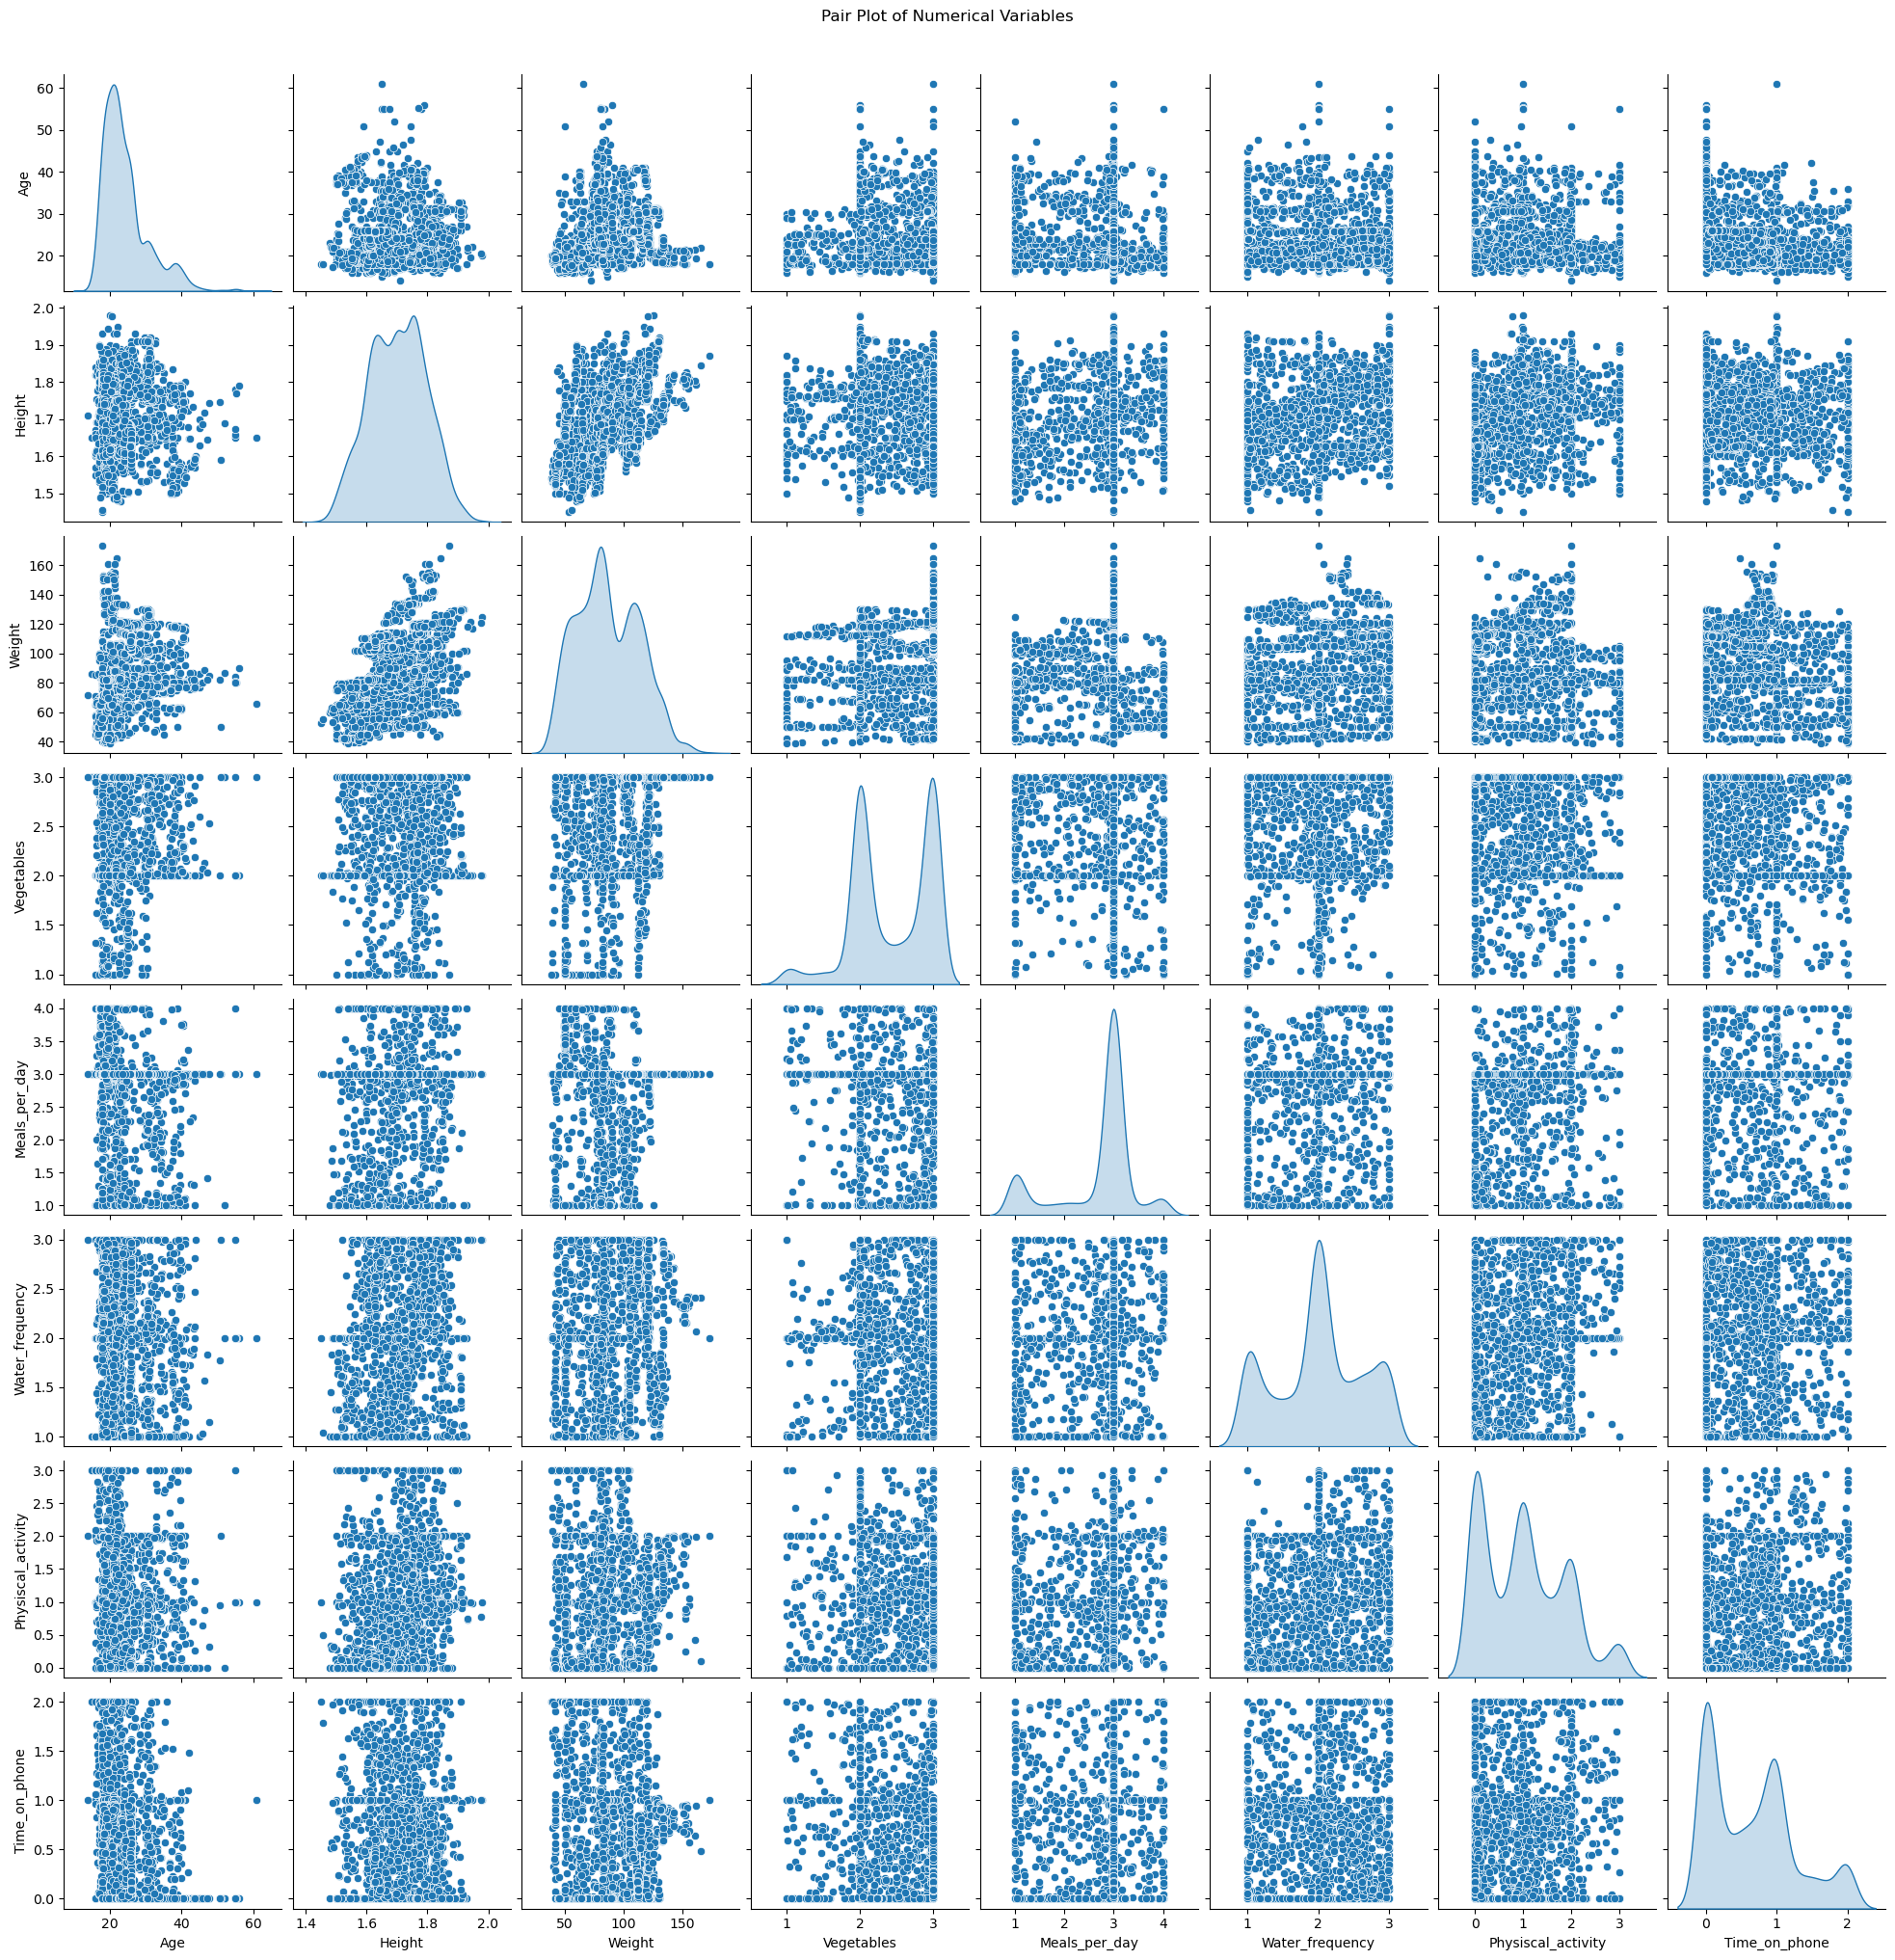

In [14]:
sns.pairplot(data.select_dtypes(include=np.number), diag_kind="kde", palette="Set2")
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

* Missing Values

<AxesSubplot:>

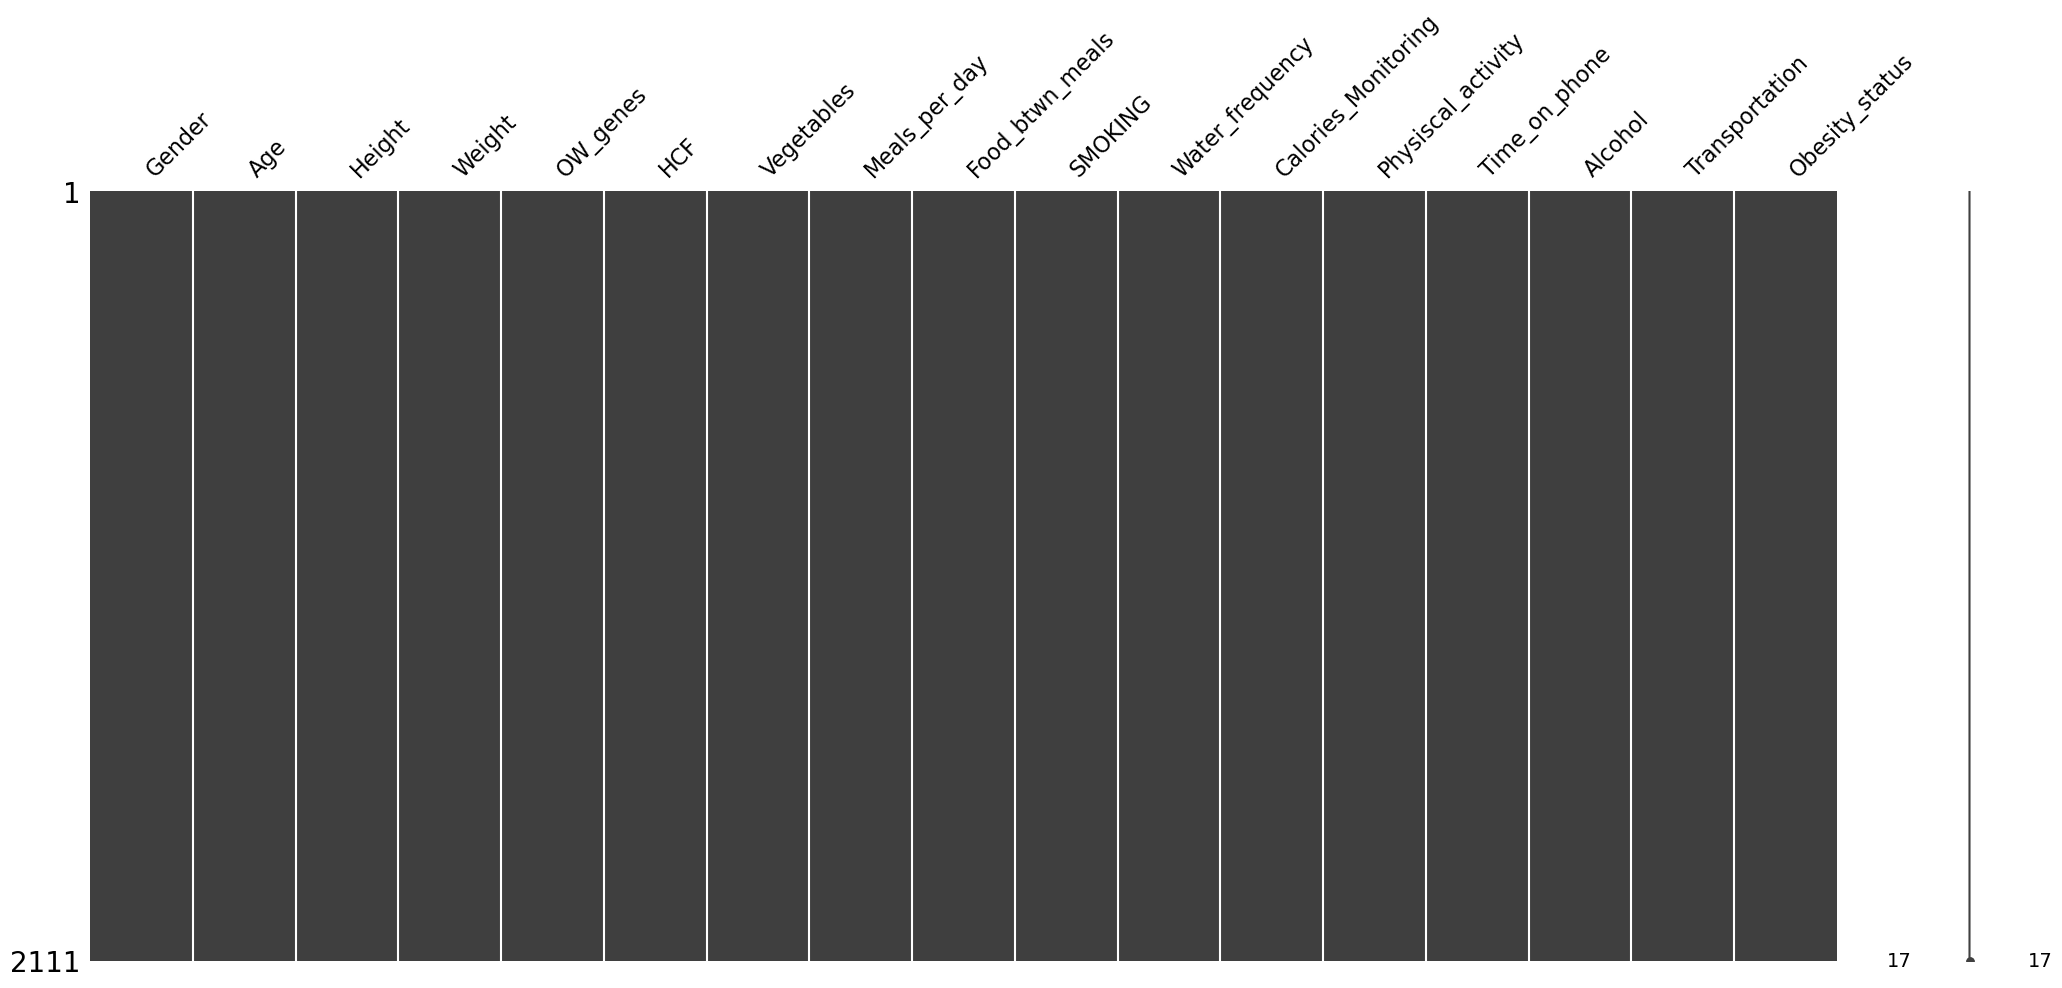

In [9]:
import missingno as msno
msno.matrix(data)

In [10]:
print('No of rows and columns in the entire dataset : ', data.shape)
print('Overall missing values in the entire dataset : ', data.isnull().sum().sum())

No of rows and columns in the entire dataset :  (2111, 17)
Overall missing values in the entire dataset :  0


* Outliers

In [11]:
# Lets draw plots based on numeric columns and categorical columns
num_col = data.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Age', 'Height', 'Weight', 'Vegetables', 'Meals_per_day',
       'Water_frequency', 'Physiscal_activity', 'Time_on_phone'],
      dtype='object')
Categorical columns: 
 Index(['Gender', 'OW_genes', 'HCF', 'Food_btwn_meals', 'SMOKING',
       'Calories_Monitoring', 'Alcohol', 'Transportation', 'Obesity_status'],
      dtype='object')


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

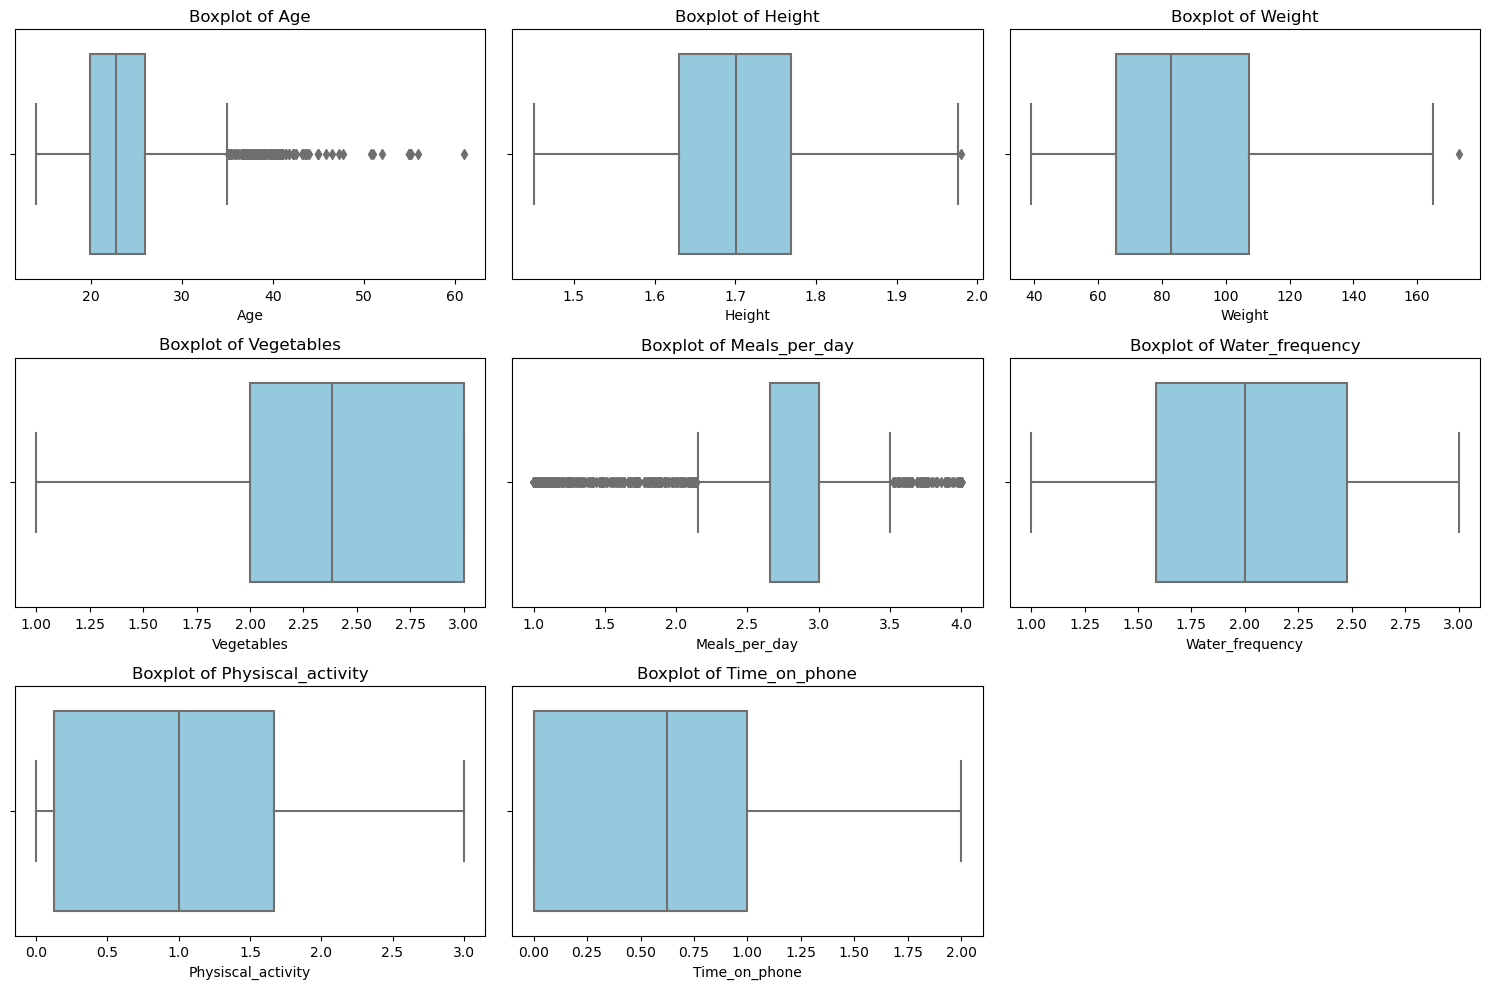

In [12]:
# Outliers

# Assuming 'data' is a DataFrame already loaded
# Select numerical columns
num_col = data.select_dtypes(include=np.number).columns

# Set up the figure
plt.figure(figsize=(15, 10))

# Generate boxplots for each numerical column
for i, col in enumerate(num_col, 1):
    plt.subplot((len(num_col) // 3) + 1, 3, i)
    sns.boxplot(data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [16]:
print("Gender \n", data['Gender'].value_counts())
print("OW_genes \n", data['OW_genes'].value_counts())
print("HCF \n", data['HCF'].value_counts())
print("SMOKING \n", data['SMOKING'].value_counts())
print("Calories_Monitoring \n", data['Calories_Monitoring'].value_counts())




Gender 
 Male      1068
Female    1043
Name: Gender, dtype: int64
OW_genes 
 yes    1726
no      385
Name: OW_genes, dtype: int64
HCF 
 yes    1866
no      245
Name: HCF, dtype: int64
SMOKING 
 no     2067
yes      44
Name: SMOKING, dtype: int64
Calories_Monitoring 
 no     2015
yes      96
Name: Calories_Monitoring, dtype: int64


In [17]:
# Rather than using one hot encoding we can do label encoding as well. Here let's use replace function rather than label encoder
data = data.replace(to_replace={'Gender': {'Female': 0,'Male':1}, 'OW_genes': {'no':0, 'yes': 1}, 'HCF' : {'no':0, 'yes': 1}, 'SMOKING' : {'no':0, 'yes': 1}, 'Calories_Monitoring' : {'no':0, 'yes': 1}})

In [18]:
sel_cols = ['Gender', 'OW_genes', 'HCF', 'SMOKING', 'Calories_Monitoring']
print(data[sel_cols])

      Gender  OW_genes  HCF  SMOKING  Calories_Monitoring
0          0         1    0        0                    0
1          0         1    0        1                    1
2          1         1    0        0                    0
3          1         0    0        0                    0
4          1         0    0        0                    0
...      ...       ...  ...      ...                  ...
2106       0         1    1        0                    0
2107       0         1    1        0                    0
2108       0         1    1        0                    0
2109       0         1    1        0                    0
2110       0         1    1        0                    0

[2111 rows x 5 columns]


In [19]:
data.head()

,Gender,Age,Height,Weight,OW_genes,HCF,Vegetables,Meals_per_day,Food_btwn_meals,SMOKING,Water_frequency,Calories_Monitoring,Physiscal_activity,Time_on_phone,Alcohol,Transportation,Obesity_status,Obesity_status_encoded
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,6


In [14]:
#print(data['Alcohol'].value_counts())

In [15]:
#print(data['Transportation'].value_counts())

In [16]:
#print(data['Food_btwn_meals'].value_counts())

In [20]:
data = pd.get_dummies(data, columns=['Food_btwn_meals', 'Alcohol', 'Transportation'])

In [21]:
data['Obesity_status'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity_status, dtype: int64

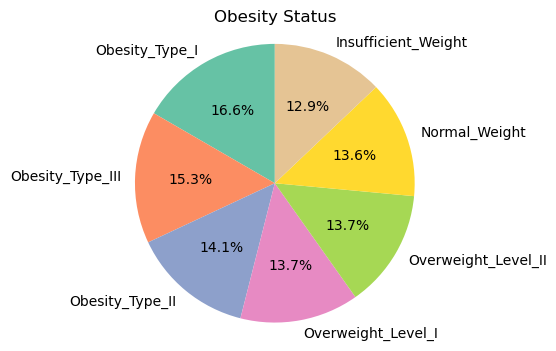

In [22]:
# Pie chart for 'Obesity_status' distribution
status_counts = data['Obesity_status'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(status_counts)))
plt.title('Obesity Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


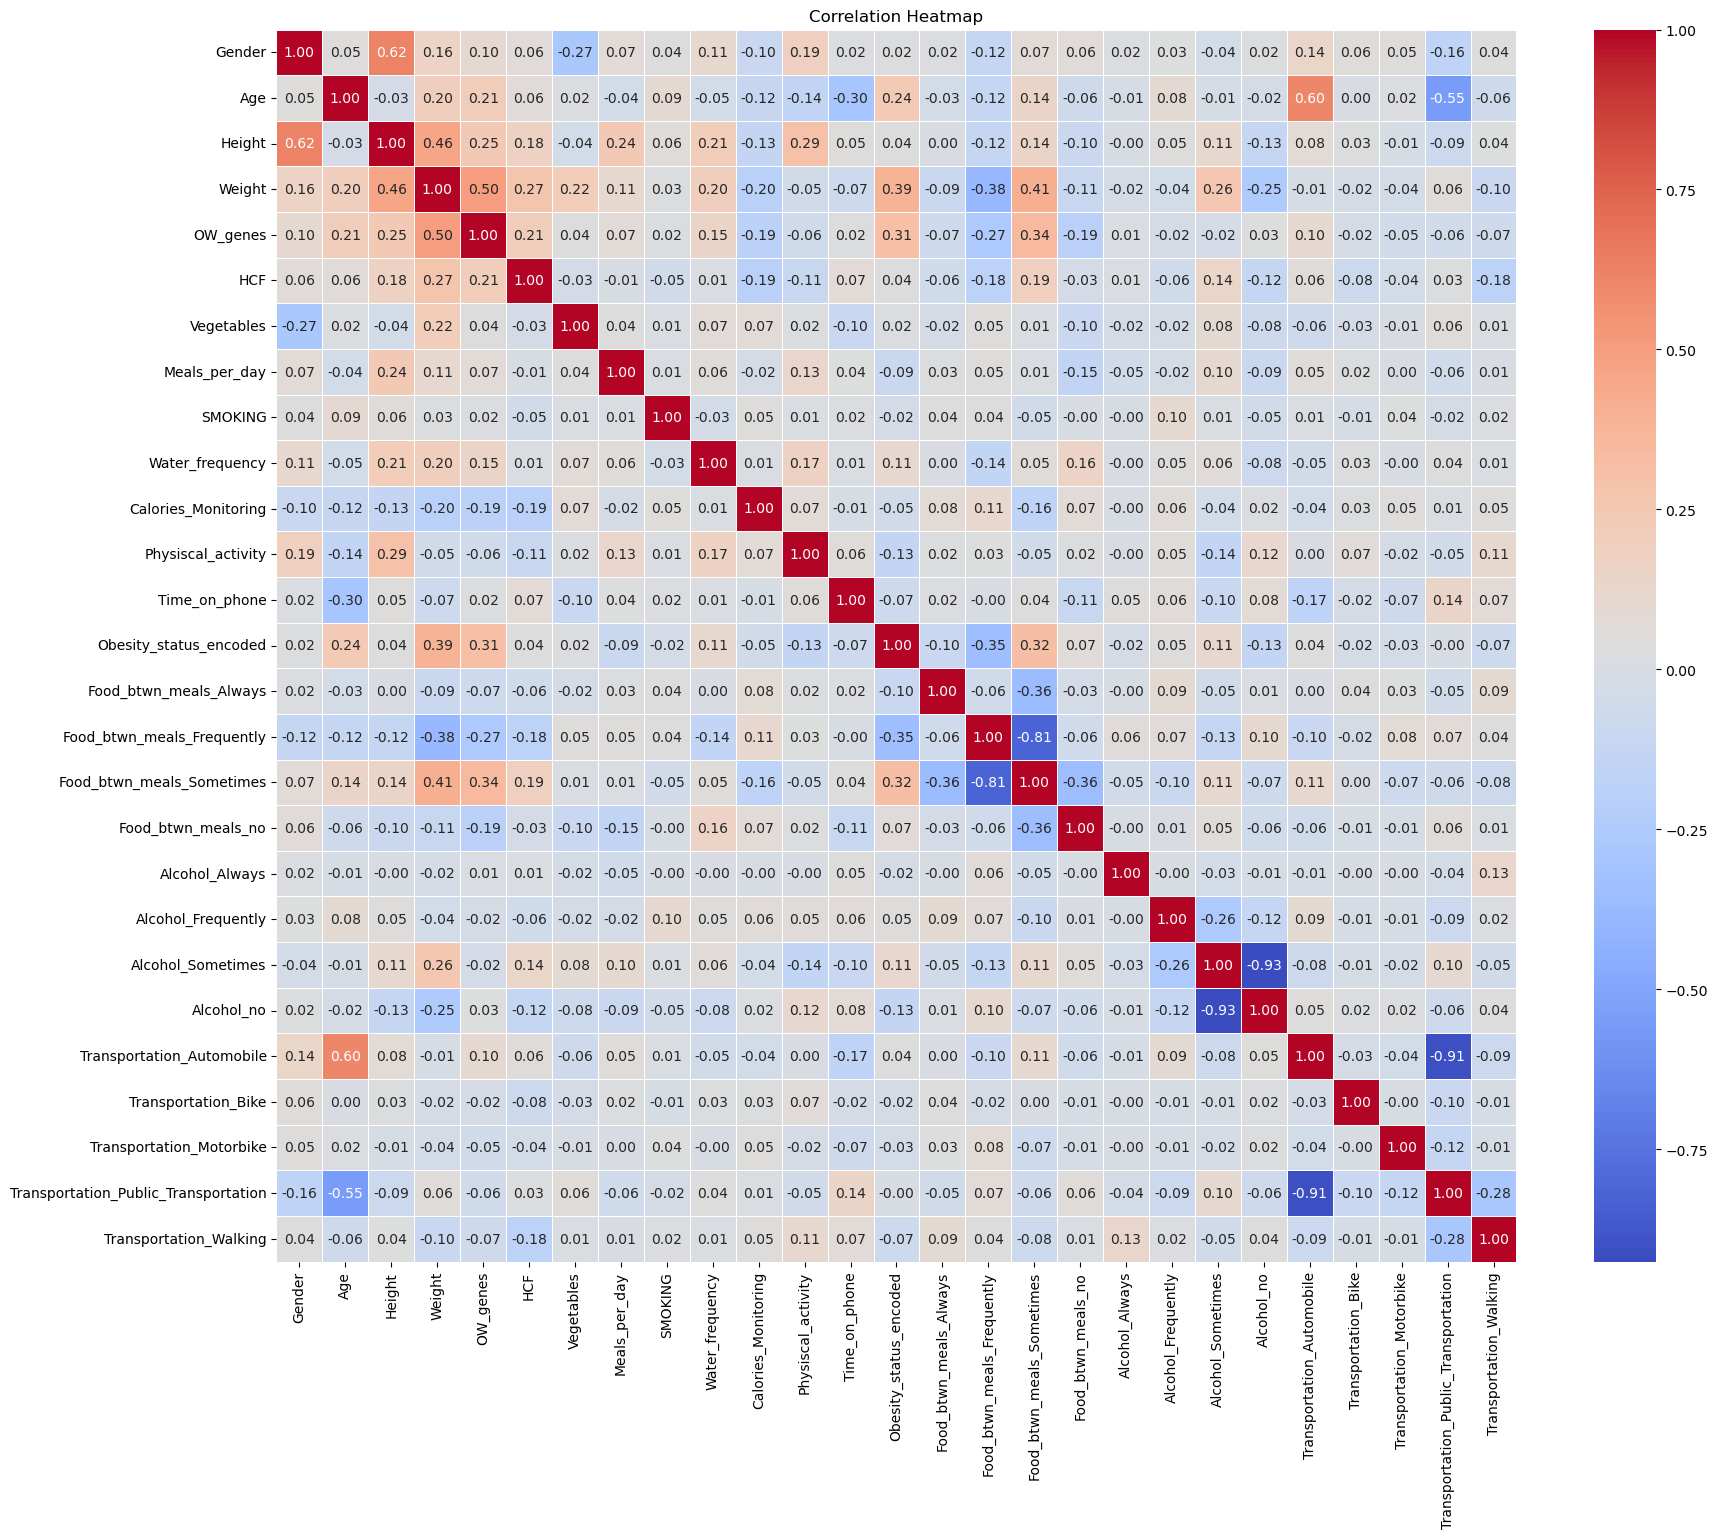

In [24]:
# Calculate correlation matrix for numerical features
correlation_matrix = data.corr()

# Plotting heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity_status, dtype: int64


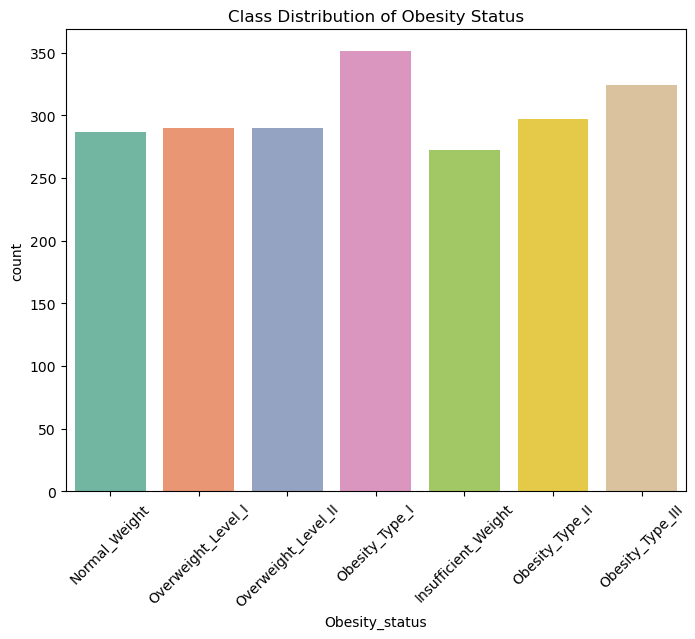

In [25]:
# Print class distribution
print(data['Obesity_status'].value_counts())

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Obesity_status', data=data, palette='Set2')
plt.title('Class Distribution of Obesity Status')
plt.xticks(rotation=45)
plt.show()


### Model Building

In [26]:
# Sklearn for ML; importing all the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC


* SVM Classifier with Kernel as 'rbf' and Regularization Parameter 1

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model = SVC(kernel='rbf', C=1)  # Linear kernel (can try 'rbf' or others)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy using the model's .score() method
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy for Regularization parameter 1 with 'rbf' kernel is: {accuracy * 100:.2f}%")


Accuracy for Regularization parameter 1 with 'rbf' kernel is: 85.11%


* SVM Classifier with Kernel as 'Linear' and Regularization Parameter 1

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model = SVC(kernel='linear', C=1)  # Linear kernel (can try 'rbf' or others)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Accuracy using the model's .score() method
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy Regularization parameter 1 is: {accuracy * 100:.2f}%")


Accuracy Regularization parameter 1 is: 95.27%


* SVM Classifier with Kernel as 'Linear' and Regularization Parameter 5

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model = SVC(kernel='linear', C=5)  # Linear kernel (can try 'rbf' or others)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy using the model's .score() method
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy Regularization parameter 5 is : {accuracy * 100:.2f}%")


Accuracy Regularization parameter 5 is : 97.64%


* SVM Classifier with Kernel as 'Linear' and Regularization Parameter 10

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model = SVC(kernel='linear', C=10)  # Linear kernel (can try 'rbf' or others)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy using the model's .score() method
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy for Regularization parameter 10 is: {accuracy * 100:.2f}%")


Accuracy for Regularization parameter 10 is: 97.87%


* SVM Classifier with Kernel as 'Linear' and Regularization Parameter 20

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model = SVC(kernel='linear', C=20)  # Linear kernel (can try 'rbf' or others)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy using the model's .score() method
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy for Regularization parameter 20 is: {accuracy * 100:.2f}%")


Accuracy for Regularization parameter 20 is: 97.64%


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model10 = SVC(kernel='linear', C=10, probability=True)  # Linear kernel (can try 'rbf' or others)
svm_model10.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_pred_prob = svm_model10.predict_proba(X_test_scaled)

# Predictions
y_pred = svm_model10.predict(X_test_scaled)

# Accuracy using the model's .score() method
accuracy = svm_model10.score(X_test_scaled, y_test)
print(f"Accuracy for Regularization parameter 10 is: {accuracy * 100:.2f}%")

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy for Regularization parameter 10 is: 97.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.98      0.95      0.97        62
           2       0.96      1.00      0.98        78
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        63
           5       0.96      0.96      0.96        56
           6       0.98      0.92      0.95        50

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 2 59  0  0  0  1  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 54  1]
 [ 0  0  3  0  0  1 46]]


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'data' is your DataFrame and features are in 'X' and target in 'y'
# Label encode the target variable 'Obesity_status'
le = LabelEncoder()
data['Obesity_status_encoded'] = le.fit_transform(data['Obesity_status'])

# Split the data into features (X) and target (y)
X = data.drop(columns=['Obesity_status', 'Obesity_status_encoded'])  # Drop target column and encoded target
y = data['Obesity_status_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, on the test set

# Fit an SVM classifier
svm_model10 = SVC(kernel='linear', C=10, probability=True)  # Linear kernel (can try 'rbf' or others)
svm_model10.fit(X_train_scaled, y_train)

# Get predicted probabilities
y_pred_prob = svm_model10.predict_proba(X_test_scaled)

# Predictions
y_pred = svm_model10.predict(X_test_scaled)

# Accuracy using the model's .score() method
accuracy = svm_model10.score(X_test_scaled, y_test)
print(f"Accuracy for Regularization parameter 10 is: {accuracy * 100:.2f}%")

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy for Regularization parameter 10 is: 97.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       0.98      0.95      0.97        62
           2       0.96      1.00      0.98        78
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        63
           5       0.96      0.96      0.96        56
           6       0.98      0.92      0.95        50

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 2 59  0  0  0  1  0]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 54  1]
 [ 0  0  3  0  0  1 46]]


In [30]:
from sklearn.metrics import log_loss
# Calculate log loss
logloss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {logloss:.4f}")


Log Loss: 0.1009


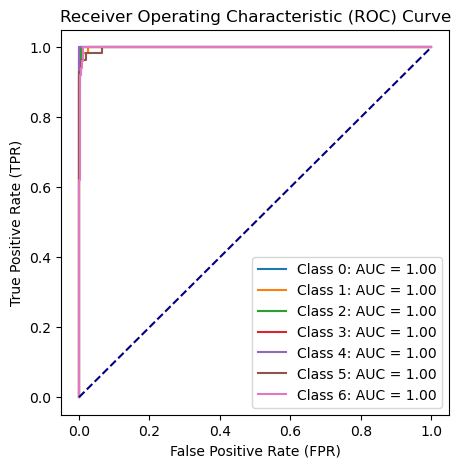

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Assuming you have fitted the model on the training data and have predictions on the test set
# For this example, we are using the Linear kernel SVM with C = 10

# Get the predicted probabilities (for multi-class, predict_proba gives probabilities for each class)
y_pred_prob = svm_model.predict_proba(X_test_scaled)

# If this is a multi-class classification, we need to use the One-vs-Rest method to get the ROC AUC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Initialize plot
plt.figure(figsize=(5, 5))

# Plot ROC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i}: AUC = {roc_auc:.2f}')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Labels and Title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.show()


##### The SVM model is showing strong performance with C = 10 which is excellent for this classification task.

In [31]:
import joblib

# Assuming your model is stored in 'best_model'
joblib.dump(svm_model10, 'svm_model.pkl')


['svm_model.pkl']